In [97]:
import pandas as pd
import numpy as np
import researchpy as rp
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Table of Contents
- [Overview](#overview)
- [Names](#names)
- [Research Question](#research_question)
- [Background](#background)
- [Hypothesis](#hypothesis)
- [Datasets](#datasets)
- [Data Cleaning](#data_cleaning)
- [Data Analysis](#data_analysis)
- [Conclusion](#conclusion)

<a id='overview'></a>
# Overview 
In the book Invisible Women, the author Caroline Criado Perez discusses that “decades of research [...] show that teaching evaluation forms are worse than useless at actually evaluating teaching and are in face ‘biased against female instructors by an amount that is large and statistically significant”’ Based on this claim we plan to research student evaluations on CAPEs at UC San Diego and see if we are able to identify any biases in student expectations of women vs men professors. We are focusing the research on the variables: student average grade expected, student average grade received,  and whether the student would recommend the professor. We conducted our analysis using [insert stats tests here] in order to determine if there is a correlation between student average grade expected and received and whether the student would recommend the professor for men and women. Upon analysis,...

<a id='names'></a>
# Names
* Niharika Bhaskar
* Nicole Martindale

<a id='research_question'></a>
# Research Question
### <span style="color:DarkCyan">To what extent does a professor being a women and a profesor being a man change how students reccomend them and how students percieve the grade they expect to recieve?</span>

<a id='background'></a>
# Background

#### Why is it of interest to us

As women computer scientists who want to pursue higher education (Master's degree, PhD, etc), this is of interest to us because there are very few women who are computer science professors and learning about the explicit and implicit bias they face is important as we continue in academia. We have personally seen the benefits of women role models especially in roles like professors and teachers and we hope to bring light to these inequities. 

Imposter Syndrome is something many people face, especially women in STEM. Negative evaluations can often contribute to beliefs that can cause harm and perpetuate self-doubt. We want to bring awareness of these biases so that the ratings are not seen as the most important way of determining the efficacy of a class and especially, the professor. 


#### What background information led you to your hypothesis.

In the book Invisible Women, the author Caroline Criado Perez discusses how student expectations of women professors can create hurdles that may not be experienced if that individual was a man. Perez explains that “students are also more likely to request extensions, grade boosts, and rule-bending of female academics” (Perez 97). This expectation that women professors will be more lenient may translate into what grade students expect in the class. If this expectation is not met students may be more upset. Furthermore, in the book Perez cites that “an analysis of 14 million reviews on the website RateMyProfessors.com found that female professors are more likely to be ‘mean, ‘harsh, ‘unfair’, ‘strict’, and ‘annoying’”(Perez 97). There seems to be evidence that students do not evaluate men professors and women professors at the same standard. Consequently, there is statistically significant evidence that teaching evaluations are biased against women. In addition, there is evidence that there are significantly fewer women computer science professors and STEM departments as a whole.

#### Why is this important?
While the project may not be able to fix any explicit biases that may be present in students, identifying and being aware of any implicit biases for individuals may be beneficial. This research project may be able to suggest that there may be biases against women professors across different departments, including various STEM departments and ultimately the Computer Science department. This will hopefully motivate students to be more aware of their own actions when it comes to evaluating professors in the future. 

Ultimately, I think the project will also suggest that students and anyone referring to CAPES and other evaluation tools should not jump to conclusions about the results of those evaluations, as there may be hidden biases against women baked into the results of those evaluations as a result of explicit and implicit biases. Ultimately, it is essential to evaluate possible inequities in evaluations to guarantee an equitable work environment for women in academia.

<a id='hypothesis'></a>
# Hypothesis
Based on the various studies cited in the book Invisible Women and extrapolating the results of those studies on the categories presented on CAPES we hypothesize that women professors on average will have higher grades expected from students, but will be recommended at lower rates compared to men professors.

<a id='datasets'></a>
# Dataset(s)
1. **Jacobs School of Engineering CAPE Evaluations**
    - **Name**:  jacobs_eng_capes.csv
    - [Link to Data](https://docs.google.com/spreadsheets/d/1MjLio0p3HbPYfjGPjIj8YpI0lgx_qnKyWSPae-fgIBU/edit?usp=sharing)
    - **Description**: This dataset contains data on the ratings of women and men professors from the various departments within the Jacobs School of Engineering from the years 2007 to 2021
    - **Source**: Course and Professor Evaluation (CAPE) 
    - **Observations**:

| Variable           	                        | Description 	|
|:--------------------	                        |:-------------	|
| Rcmnd Instr           	                        | % of students who reccomend instructor       	|
| Avg Grade Expected              	                        | average grade student expected       	|
| Avg Grade Received               	                        | average grade student recieved            	|

2. **Biological Sciences CAPE Evaluations**
    - **Name**: bio_sci_capes.csv
    - [Link to Data](https://docs.google.com/spreadsheets/d/1ejbpa4pENkSDyB56eFo5WGleFBTcSHw_OTwTKmw4H20/edit?usp=sharing)
    - **Description**: This dataset contains data on the ratings of women and men professors from the biological sciences department from the years 2007 to 2021
    - **Source**: Course and Professor Evaluation (CAPE) 
    - **Observations**:

| Variable           	                        | Description 	|
|:--------------------	                        |:-------------	|
| Rcmnd Instr           	                        | % of students who reccomend instructor       	|
| Avg Grade Expected              	                        | average grade student expected       	|
| Avg Grade Received               	                        | average grade student recieved            	|

2. **Humanities CAPE Evaluations**
    - **Name**: humanities_capes.csv
    - [Link to Data](https://docs.google.com/spreadsheets/d/1RXHr4ROl9AboFbWTegWW0iDBkq5jpqzijdehjE3RSOA/edit?usp=sharing)
    - **Description**: This dataset contains data on the ratings of women and men professors from the humanities department from the years 2007 to 2021
    - **Source**: Course and Professor Evaluation (CAPE) 
    - **Observations**:

| Variable           	                        | Description 	|
|:--------------------	                        |:-------------	|
| Rcmnd Instr           	                        | % of students who reccomend instructor       	|
| Avg Grade Expected              	                        | average grade student expected       	|
| Avg Grade Received               	                        | average grade student recieved            	|


<a id='data_cleaning'></a>
# Data Cleaning

## CSE Department

In [98]:
# Split function to get grade numerical value
def split_func(x) : 
    return(float(x.split('(')[1][:-1]))

In [99]:
# Read in data for cse department
df_cse_rec = pd.read_csv("jacobs_capes/cse_capes.csv", usecols= ['Instructor','Rcmnd Instr'])
df_cse_grade = pd.read_csv("jacobs_capes/cse_capes.csv", usecols= ['Instructor','Avg Grade Expected', 'Avg Grade Received'])

# Change percent reccomend to decimal
df_cse_rec['Rcmnd Instr'] = df_cse_rec['Rcmnd Instr'].str.rstrip('%').astype('float') / 100.0

# Array with women professors
women_profs = ['Heninger, Nadia A', 'Rosing, Tajana Simunic', 'Chaudhuri, Kamalika', 'Alvarado, Christine J.', 'Minnes Kemp, Mor Mia', 'Polikarpova, Nadezhda', 'Esmaeilzadeh, Hadi', 'Riek, Laurel D', 'Gymrek, Melissa Ann', 'Chaudhuri, Kamalika', 'Nakashole, Ndapandula', 'Zaitsev, Anna L', 'Altintas De Callaf, Ilkay', 'Zhang, Yiying', 'Zhao, Jishen', 'Zhou, Yuan-Yuan']

# Drop null values
df_cse_rec = df_cse_rec.dropna()
df_cse_grade = df_cse_grade.dropna()

# Rename columns for convenience
df_cse_rec = df_cse_rec.rename(columns={"Instructor":"prof", "Rcmnd Instr":"rec_percent", "Gender": "gender"})
df_cse_grade = df_cse_grade.rename(columns={"Instructor":"prof","Avg Grade Expected": "expected", "Avg Grade Received": "received"})

# Split expected and received in order to extract grade value as decimal
df_cse_grade['value_e'] = df_cse_grade['expected'].apply(split_func)
df_cse_grade['value_r'] = df_cse_grade['received'].apply(split_func)
df_cse_grade = df_cse_grade.drop(columns=['expected', 'received'])
df_cse_grade = df_cse_grade.rename(columns={'value_e':'expected', 'value_r':'received'})

# Average out recommend percent for all classes professor has taught
df_cse_rec_avg = df_cse_rec.groupby('prof', as_index=False).mean()

#Average out expected & recieved grade for all classes professor has taught
df_cse_grade = df_cse_grade.groupby('prof', as_index=False).mean()

# Add column for gender for professor in both dataframes
df_cse_rec_avg['gender'] = np.where(df_cse_rec_avg['prof'].isin(women_profs), "W", "M")
df_cse_grade['gender'] = np.where(df_cse_grade['prof'].isin(women_profs), "W", "M")

In [100]:
df_cse_rec_avg.head()

,prof,rec_percent,gender
0,"Aksanli, Baris",1.000000,M
1,"Allos, Haytham Issa",0.815333,M
2,"Altintas De Callaf, Ilkay",0.794484,W
3,"Alvarado, Christine J.",0.975818,W
4,"Anderson, James W.",0.600000,M


In [101]:
df_cse_grade.head()

,prof,expected,received,gender
0,"Aksanli, Baris",3.180000,2.840000,M
1,"Allos, Haytham Issa",3.543333,3.268333,M
2,"Altintas De Callaf, Ilkay",3.511667,3.248333,W
3,"Alvarado, Christine J.",3.531429,3.124524,W
4,"Arsanjani, Ali Paul",3.255000,3.055000,M


## Biological Sciences Department

In [102]:
# Read in data for biological sciences department
df_bio_rec = pd.read_csv("capes/bio_sci_capes.csv", usecols= ['Instructor','Rcmnd Instr'])
df_bio_grade = pd.read_csv("capes/bio_sci_capes.csv", usecols= ['Instructor','Avg Grade Expected', 'Avg Grade Received'])


# Change percent reccomend to decimal
df_bio_rec['Rcmnd Instr'] = df_bio_rec['Rcmnd Instr'].str.rstrip('%').astype('float') / 100.0

# Array with women professors
women_profs = ['Ackerman, Susan', 'Dutton, Rachel Janelle', 'Bloodgood, Brenda Laurie', 'Butler, Madeline', 'Chilukuri, Lakshmi N', 'Cleland, Elsa Eleanor', 'Cook-Andersen, Heidi Leigh', 'Cooper, Kimberly Lynn', 'Dutton, Rachel Janelle', 'Farley, Emma Kristen', 'French, Kathleen Ann', 'Glasgow, Stacey Marie', 'Golden, Susan S.', 'Goldrath, Ananda', 'Halpain, Shelley', 'Huffaker, Alisa', 'Jin, Yishi', 'Jones, Katherine A.', 'Juavinett, Ashley Lauren', 'Karlseder, Jan', 'Kiger, Amy', 'Kurle, Carolyn M.', 'Lauberth, Shannon Marie', 'Leutgeb, Jill K.', 'Markow, Therese A.', 'McDonnell, Lisa Marie', 'Meaders, Clara Leigh', 'Mel, Stephanie', 'Niwa, Maho', 'Oegema, Karen', 'Owens, Melinda Tsao-Ying', 'Pasquinelli, Amy', 'Pekkurnaz Banghart, Gulcin', 'Petrie, Katherine Lynn','Pillus, Lorraine', 'Pogliano, Kit J.', 'Reinagel, Pam', 'Rennison, Diana', 'Smith, Laurie', 'Stockwell, Sarah R', 'Su, Chih-Ying', 'Tour, Ella', 'Troemel, Emily Ruth', 'Villa Rodriguez, Elizabeth', 'Wienhausen, Gabriele', 'Yelon, Deborah', 'Zhang, Dong-Er', 'Zuniga, Elina I']

# Drop null values
df_bio_rec = df_bio_rec.dropna()
df_bio_grade = df_bio_grade.dropna()

# Rename columns for convenience
df_bio_rec = df_bio_rec.rename(columns={"Instructor":"prof", "Rcmnd Instr":"rec_percent", "Gender": "gender"})
df_bio_grade = df_bio_grade.rename(columns={"Instructor":"prof","Avg Grade Expected": "expected", "Avg Grade Received": "received"})

# Split expected and received in order to extract grade value as decimal
df_bio_grade['value_e'] = df_bio_grade['expected'].apply(split_func)
df_bio_grade['value_r'] = df_bio_grade['received'].apply(split_func)
df_bio_grade = df_bio_grade.drop(columns=['expected', 'received'])
df_bio_grade = df_bio_grade.rename(columns={'value_e':'expected', 'value_r':'received'})

# Average out reccomend percent for all classes professor has taught
df_bio_rec_avg = df_bio_rec.groupby('prof', as_index=False).mean()

# Average out expected & recieved grade for all classes professor has taught
df_bio_grade = df_bio_grade.groupby('prof', as_index=False).mean()

# Add column for gender for professor
df_bio_rec_avg['gender'] = np.where(df_bio_rec_avg['prof'].isin(women_profs), "W", "M")
df_bio_grade['gender'] = np.where(df_bio_grade['prof'].isin(women_profs), "W", "M")

In [103]:
df_bio_rec_avg.head()

,prof,rec_percent,gender
0,"Ackerman, Susan",0.849500,W
1,"Adomako, Marie Antonia",0.943000,M
2,"Akbari, Omar Sultan",0.937200,M
3,"Alfonso, Stephanie Isabel",0.794333,M
4,"Allen, Eric",0.987357,M


In [104]:
df_bio_grade.head()

,prof,expected,received,gender
0,"Ackerman, Susan",3.670000,3.605000,W
1,"Adomako, Marie Antonia",3.350000,3.160000,M
2,"Akbari, Omar Sultan",3.442500,3.305000,M
3,"Alfonso, Stephanie Isabel",3.230000,2.826667,M
4,"Allen, Eric",3.740714,3.613571,M


## Humanities Department

In [105]:
# Read in data for biological sciences department
df_hum_rec = pd.read_csv("capes/humanities_capes.csv", usecols= ['Instructor','Rcmnd Instr'])
df_hum_grade = pd.read_csv("capes/humanities_capes.csv", usecols= ['Instructor','Avg Grade Expected', 'Avg Grade Received'])

# Change percent reccomend to decimal
df_hum_rec['Rcmnd Instr'] = df_hum_rec['Rcmnd Instr'].str.rstrip('%').astype('float') / 100.0

# Array with women professors
women_profs = ['Markman, Kristina', 'Giordano, Kailey Nicole', 'Zroka, Amy Liane', 'Boettcher, Carolin', 'Thompson, Katherine Anne Merit', 'Demetriou, Denise', 'Greene, Blythe Anastasia', 'Smarr, Janet L.', 'Caciola, Nancy A', 'Solomon, Amanda Lee Albaniel','Jed, Stephanie H', 'Bialo, Caralyn Alyssa','Lampert-Weissig, Lisa', 'Stevens, Jane', 'Steiner, Jill', 'Kugler, Emily MeriNitta']

# Drop null values
df_hum_rec = df_hum_rec.dropna()
df_hum_grade = df_hum_grade.dropna()

# Rename columns for convenience
df_hum_rec = df_hum_rec.rename(columns={"Instructor":"prof", "Rcmnd Instr":"rec_percent", "Gender": "gender"})
df_hum_grade = df_hum_grade.rename(columns={"Instructor":"prof","Avg Grade Expected": "expected", "Avg Grade Received": "received"})

# Split expected and received in order to extract grade value as decimal
df_hum_grade['value_e'] = df_hum_grade['expected'].apply(split_func)
df_hum_grade['value_r'] = df_hum_grade['received'].apply(split_func)
df_hum_grade = df_hum_grade.drop(columns=['expected', 'received'])
df_hum_grade = df_hum_grade.rename(columns={'value_e':'expected', 'value_r':'received'})

# Average out reccomend percent for all classes professor has taught
df_hum_rec_avg = df_hum_rec.groupby('prof', as_index=False).mean()

#Average out expected & recieved grade for all classes professor has taught
df_hum_grade = df_hum_grade.groupby('prof', as_index=False).mean()

# Add column for gender for professor
df_hum_rec_avg['gender'] = np.where(df_hum_rec_avg['prof'].isin(women_profs), "W", "M")
df_hum_grade['gender'] = np.where(df_hum_grade['prof'].isin(women_profs), "W", "M")

In [106]:
df_hum_rec_avg.head()

,prof,rec_percent,gender
0,"Bialo, Caralyn Alyssa",1.000000,W
1,"Boettcher, Carolin",0.889000,W
2,"Caciola, Nancy A",0.929400,W
3,"Caldwell, Michael A.",0.996750,M
4,"Caldwell, Michael Alan",0.981187,M


In [107]:
df_hum_grade.head()

,prof,expected,received,gender
0,"Bialo, Caralyn Alyssa",2.890000,2.760000,W
1,"Boettcher, Carolin",3.220000,2.990000,W
2,"Caciola, Nancy A",3.028000,2.987000,W
3,"Caldwell, Michael A.",2.870000,2.747500,M
4,"Caldwell, Michael Alan",3.093333,3.049333,M


# Data Descriptive Statistics

## CSE Department

In [108]:
df_cse_rec_avg['gender'].value_counts()

M    202
W     15
Name: gender, dtype: int64

#### CSE Recommendation

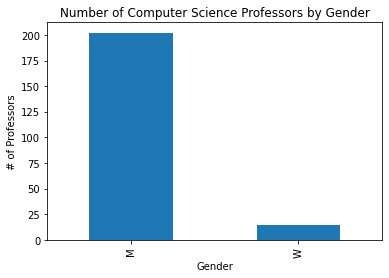

In [109]:
# Bar graphs with numbers of woman professors and men professors in CSE department
ax_cse_count = df_cse_rec_avg['gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('# of Professors')
ax_cse_count.set_title('Number of Computer Science Professors by Gender')
f1 = plt.gcf()

Text(0, 0.5, 'Ratio Recommend Professor')

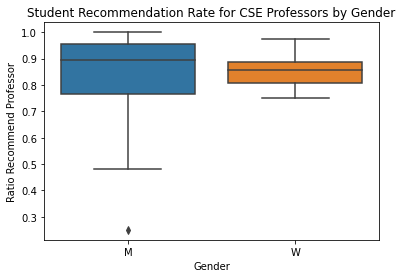

In [110]:
# Box Plots to see range of expected grades for professors base on gender
ax_cse_rec_box = sns.boxplot(x="gender", y="rec_percent", data=df_cse_rec_avg)
ax_cse_rec_box.set_title('Student Recommendation Rate for CSE Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio Recommend Professor')

#### Expected vs Received Grade

Text(0, 0.5, 'Expected Grade for Professor')

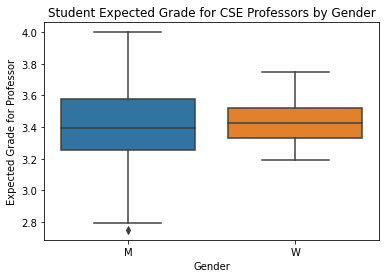

In [111]:
# Box Plots to see range of expected grades for professors base on gender
ax_cse_e_box = sns.boxplot(x="gender", y="expected", data=df_cse_grade)
ax_cse_e_box.set_title('Student Expected Grade for CSE Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Grade for Professor')

Text(0, 0.5, 'Received Grade for Professor')

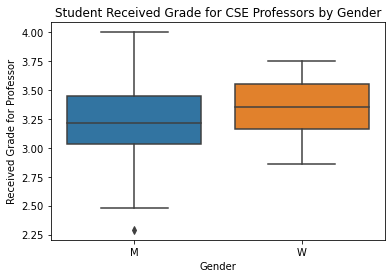

In [112]:
# Box Plots to see range of received grades for professors base on gender
ax_cse_r_box = sns.boxplot(x="gender", y="received", data=df_cse_grade)
ax_cse_r_box.set_title('Student Received Grade for CSE Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Received Grade for Professor')

Text(0, 0.5, 'Percent Difference')

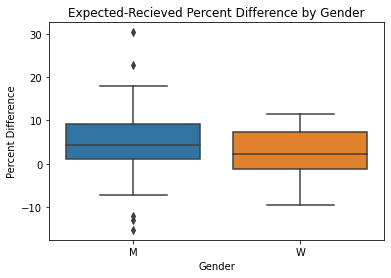

In [113]:
# Percent difference between expected - received 
df_cse_grade['per_dif'] = ((df_cse_grade['expected']-df_cse_grade['received'])/df_cse_grade['expected'])*100

# Box Plots to see range of received grades for professors base on gender
ax_cse_dif_box = sns.boxplot(x="gender", y='per_dif', data=df_cse_grade)
ax_cse_dif_box.set_title('Expected-Recieved Percent Difference by Gender')
plt.xlabel('Gender')
plt.ylabel('Percent Difference')

## Biological Sciences Department

In [114]:
df_bio_rec_avg['gender'].value_counts()

M    265
W     47
Name: gender, dtype: int64

#### Bio Recommendation


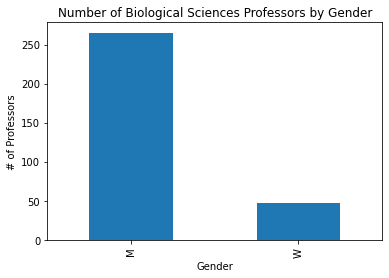

In [115]:
# Bar graphs with numbers of woman professors and men professors in Bio. Sci. department
ax_bio_count = df_bio_rec_avg['gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('# of Professors')
ax_bio_count.set_title('Number of Biological Sciences Professors by Gender')
f1 = plt.gcf()

Text(0, 0.5, 'Ratio Recommend Professor')

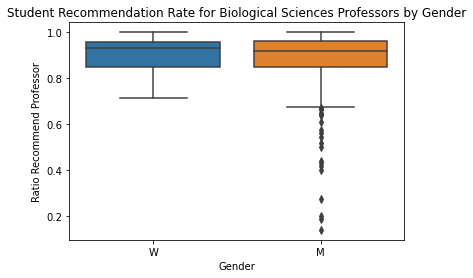

In [116]:
# Box Plots to see range of reccomendations for professors base on gender
ax_bio_rec_box = sns.boxplot(x="gender", y="rec_percent", data=df_bio_rec_avg)
ax_bio_rec_box.set_title('Student Recommendation Rate for Biological Sciences Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio Recommend Professor')

#### Expected vs Received Grade

Text(0, 0.5, 'Expected Grade for Professor')

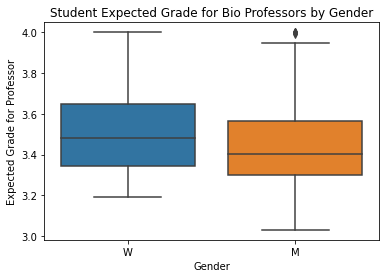

In [117]:
# Box Plots to see range of expected grades for professors base on gender
ax_bio_e_box = sns.boxplot(x="gender", y="expected", data=df_bio_grade)
ax_bio_e_box.set_title('Student Expected Grade for Bio Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Grade for Professor')

Text(0, 0.5, 'Expected Grade for Professor')

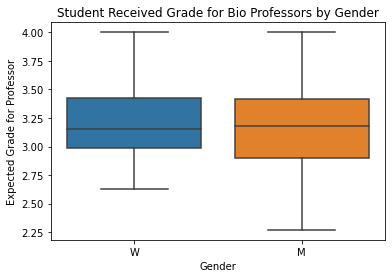

In [118]:
# Box Plots to see range of received grades for professors base on gender
ax_cse_r_box = sns.boxplot(x="gender", y="received", data=df_bio_grade)
ax_cse_r_box.set_title('Student Received Grade for Bio Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Grade for Professor')

Text(0, 0.5, 'Percent Difference')

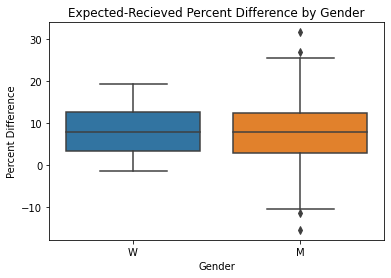

In [119]:
# Percent difference between expected - received 
df_bio_grade['per_dif'] = ((df_bio_grade['expected']-df_bio_grade['received'])/df_bio_grade['expected'])*100

# Box Plots to see range of received grades for professors base on gender
ax_bio_dif_box = sns.boxplot(x="gender", y='per_dif', data=df_bio_grade)
ax_bio_dif_box.set_title('Expected-Recieved Percent Difference by Gender')
plt.xlabel('Gender')
plt.ylabel('Percent Difference')

## Humanities Department

In [120]:
df_hum_rec_avg['gender'].value_counts()

M    28
W    16
Name: gender, dtype: int64

#### Hum Recommendation

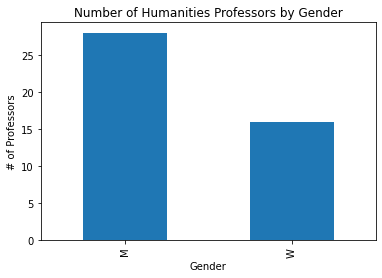

In [121]:
# Bar graphs with numbers of woman professors and men professors in Humanities department
ax_bio_count = df_hum_rec_avg['gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('# of Professors')
ax_bio_count.set_title('Number of Humanities Professors by Gender')
f1 = plt.gcf()

Text(0, 0.5, 'Ratio Recommend Professor')

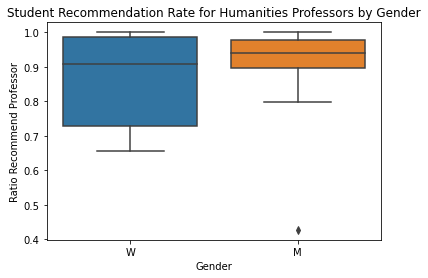

In [122]:
# Box Plots to see range of reccomendations for professors base on gender
ax_bio_rec_box = sns.boxplot(x="gender", y="rec_percent", data=df_hum_rec_avg)
ax_bio_rec_box.set_title('Student Recommendation Rate for Humanities Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio Recommend Professor')

#### Expected vs Received Grade

Text(0, 0.5, 'Expected Grade for Professor')

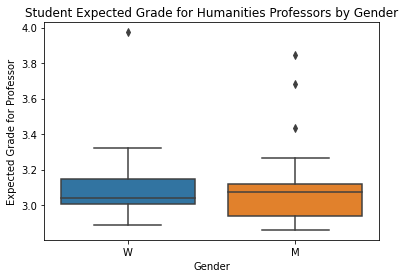

In [123]:
# Box Plots to see range of expected grades for professors base on gender
ax_hum_e_box = sns.boxplot(x="gender", y="expected", data=df_hum_grade)
ax_hum_e_box.set_title('Student Expected Grade for Humanities Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Grade for Professor')

Text(0, 0.5, 'Received Grade for Professor')

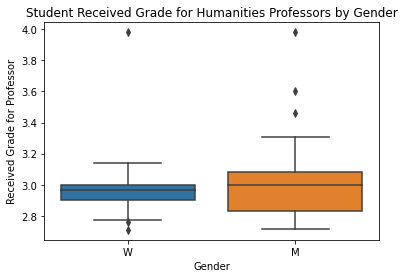

In [124]:
# Box Plots to see range of received grades for professors base on gender
ax_hum_r_box = sns.boxplot(x="gender", y="received", data=df_hum_grade)
ax_hum_r_box.set_title('Student Received Grade for Humanities Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Received Grade for Professor')

Text(0, 0.5, 'Percent Difference')

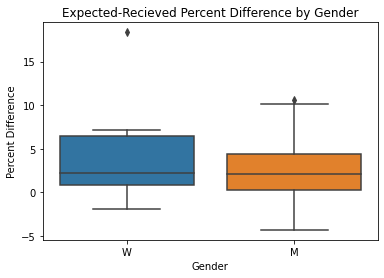

In [125]:
# Percent difference between expected - received 
df_hum_grade['per_dif'] = ((df_hum_grade['expected']-df_hum_grade['received'])/df_hum_grade['expected'])*100

# Box Plots to see range of received grades for professors base on gender
ax_hum_dif_box = sns.boxplot(x="gender", y='per_dif', data=df_hum_grade)
ax_hum_dif_box.set_title('Expected-Recieved Percent Difference by Gender')
plt.xlabel('Gender')
plt.ylabel('Percent Difference')

<a id='data_analysis'></a>
# Data Analysis


## CSE Department

### *Hypothesis Testing*

#### Recommendation Percent Rates
$H_o$: There is no difference between the recommendation rates of men and women professors

$H_a$: There is a difference between the recommendation rates of men and women professors

<a id='conclusion'></a>
# Conclusion